In [19]:
!pip install pandas numpy matplotlib seaborn plotly kaleido


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [kaleido]m4/5 [kaleido]apher]


In [33]:
# FIXED SOLUTION - Reload fresh data and run analysis
print("🔧 FIXING DATA ISSUE - RELOADING FRESH DATA")
print("=" * 60)

# STEP 1: Load fresh data (this will work - we confirmed it in debug)
data = pd.read_csv('/mnt/nasdrive/shared/raw_data/CQI Comments/CQI Export_2025_06_30_162107.csv', dtype=str, engine='python', on_bad_lines='skip')
print(f"✅ Fresh data loaded: {len(data)} rows, {len(data.columns)} columns")

# STEP 2: Verify the Response column exists
response_col = 'Response EMS Response Number (eResponse.04)'
print(f"Response column exists: {response_col in data.columns}")

if response_col in data.columns:
    print(f"Sample response numbers: {data[response_col].head(3).tolist()}")
else:
    print("❌ Still missing - checking all columns for 'Response':")
    for col in data.columns:
        if 'response' in col.lower():
            print(f"  Found: {col}")

# STEP 3: Parse dates
data['Incident Date'] = pd.to_datetime(data['Incident Date'], errors='coerce')

# STEP 4: Filter to valid incidents (CAREFULLY)
print(f"\nFiltering to valid incidents...")
valid_mask = (
    data[response_col].notna() &
    (data[response_col] != '(blank)') &
    (data[response_col].astype(str).str.strip() != '')
)

data_valid = data[valid_mask].copy()
print(f"✅ Valid incidents: {len(data_valid)}")

# STEP 5: Verify column still exists after filtering
print(f"Response column exists after filtering: {response_col in data_valid.columns}")

# STEP 6: Simple deduplication (keep first occurrence of each response number)
print(f"\nDeduplicating...")
unique_before = data_valid[response_col].nunique()
data_dedupe = data_valid.drop_duplicates(subset=[response_col], keep='first')
print(f"✅ Deduplicated: {len(data_valid)} → {len(data_dedupe)} (removed {len(data_valid) - len(data_dedupe)} duplicates)")

# STEP 7: Final verification
print(f"Final check - Response column exists: {response_col in data_dedupe.columns}")
print(f"Sample response numbers: {data_dedupe[response_col].head(3).tolist()}")

# STEP 8: Quick compliance analysis
print(f"\n🎯 QUICK COMPLIANCE ANALYSIS")
print("=" * 35)

# Get activations
stemi_acts = data_dedupe[data_dedupe['Destination STEMI Team Pre-arrival Activation (eDisposition.24)'] == 'true']
stroke_acts = data_dedupe[data_dedupe['Destination Stroke Team Pre-arrival Activation (eDisposition.24)'] == 'true']
trauma_acts = data_dedupe[data_dedupe['Destination Adult Trauma Team Pre-arrival Activation (eDisposition.24)'] == 'true']

print(f"STEMI activations: {len(stemi_acts)}")
print(f"Stroke activations: {len(stroke_acts)}")
print(f"Trauma activations: {len(trauma_acts)}")
print(f"Total critical activations: {len(stemi_acts) + len(stroke_acts) + len(trauma_acts)}")

# Check completion status
for name, acts in [('STEMI', stemi_acts), ('Stroke', stroke_acts), ('Trauma', trauma_acts)]:
    if len(acts) > 0:
        completed = acts[acts['CQI Status'].isin(['Completed', 'No CQI Needed'])]
        rate = len(completed) / len(acts) * 100
        missing = len(acts) - len(completed)

        print(f"\n{name}:")
        print(f"  Total: {len(acts)}")
        print(f"  Completed: {len(completed)} ({rate:.1f}%)")
        print(f"  Missing: {missing}")

        # Show sample missing incidents
        no_cqi = acts[(acts['CQI Category Name'].isna()) | (acts['CQI Category Name'] == '(blank)')]
        if len(no_cqi) > 0:
            print(f"  Sample missing CQI assignments:")
            for idx, row in no_cqi.head(3).iterrows():
                print(f"    {row[response_col]} - {row['Incident Date'].strftime('%m/%d/%Y')}")

# STEP 9: Update the global data variable
globals()['data'] = data_dedupe
print(f"\n✅ FIXED! Global 'data' variable updated with clean data")
print(f"   Rows: {len(data_dedupe)}")
print(f"   Response column exists: {response_col in data_dedupe.columns}")

print(f"\n🎯 NOW YOU CAN RUN THE COMPLIANCE ANALYSIS!")
print("The 'data' variable is now fixed and ready to use.")

🔧 FIXING DATA ISSUE - RELOADING FRESH DATA
✅ Fresh data loaded: 39697 rows, 119 columns
Response column exists: True
Sample response numbers: ['098', '098', '051']

Filtering to valid incidents...
✅ Valid incidents: 38769
Response column exists after filtering: True

Deduplicating...
✅ Deduplicated: 38769 → 19498 (removed 19271 duplicates)
Final check - Response column exists: True
Sample response numbers: ['098', '051', '064']

🎯 QUICK COMPLIANCE ANALYSIS
STEMI activations: 21
Stroke activations: 151
Trauma activations: 94
Total critical activations: 266

STEMI:
  Total: 21
  Completed: 16 (76.2%)
  Missing: 5
  Sample missing CQI assignments:
    25-26985 - 06/21/2025
    25-27626 - 06/26/2025
    25-28109 - 06/29/2025

Stroke:
  Total: 151
  Completed: 14 (9.3%)
  Missing: 137
  Sample missing CQI assignments:
    064 - 01/01/2025
    128 - 01/01/2025
    122 - 01/01/2025

Trauma:
  Total: 94
  Completed: 19 (20.2%)
  Missing: 75
  Sample missing CQI assignments:
    142 - 01/01/202

🏥 FINAL CQI COMPLIANCE DASHBOARD
📊 COMPREHENSIVE COMPLIANCE ANALYSIS

STEMI ANALYSIS:
--------------------
Total activations: 21
Completed reviews: 16 (76.2%)
In progress: 1
Not started: 1
No CQI assigned: 3
Assignment rate: 85.7%
Status: 🔶 Needs Attention

Recent incidents missing CQI (sample):
  25-28109 - 06/29/2025
  25-27626 - 06/26/2025
  25-26985 - 06/21/2025

STROKE ANALYSIS:
--------------------
Total activations: 151
Completed reviews: 14 (9.3%)
In progress: 1
Not started: 3
No CQI assigned: 131
Assignment rate: 13.2%
Status: ❌ Non-Compliant

Recent incidents missing CQI (sample):
  25-27768 - 06/27/2025
  25-27745 - 06/27/2025
  25-27653 - 06/26/2025
  25-27486 - 06/25/2025
  25-27168 - 06/23/2025

TRAUMA ANALYSIS:
--------------------
Total activations: 94
Completed reviews: 19 (20.2%)
In progress: 5
Not started: 0
No CQI assigned: 68
Assignment rate: 27.7%
Status: ❌ Non-Compliant

Recent incidents missing CQI (sample):
  25-27893 - 06/28/2025
  25-27896 - 06/28/2025
  25-2

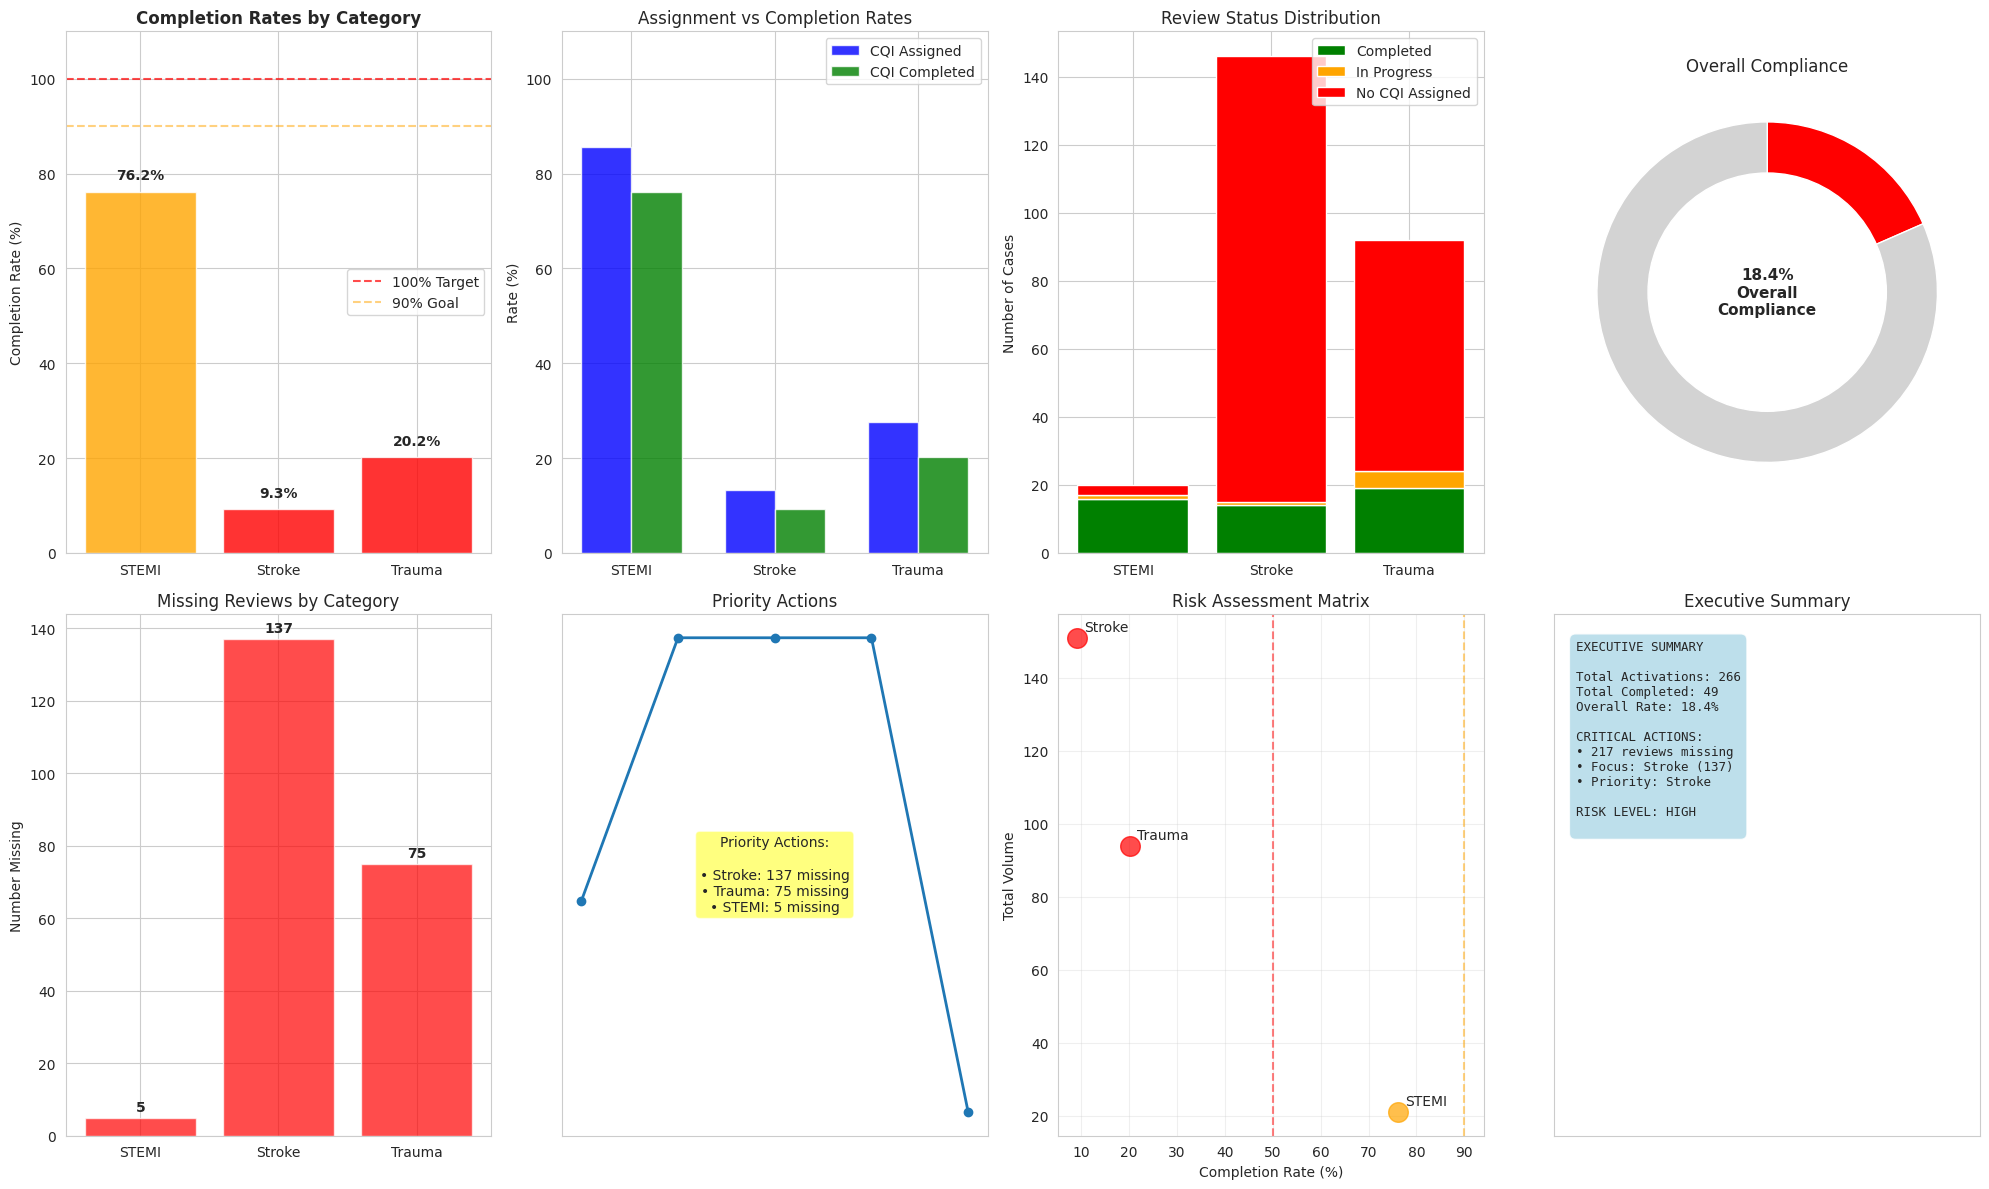

💾 Dashboard saved: Comprehensive_CQI_Dashboard_20250701_2151.png

📋 EXPORTING MISSING INCIDENT REPORTS
✅ STEMI: 3 missing → Missing_STEMI_CQI_Reviews_20250701_2151.csv
   Age distribution: ≤30d: 3, 31-60d: 0, 61-90d: 0, >90d: 0
✅ Stroke: 131 missing → Missing_Stroke_CQI_Reviews_20250701_2151.csv
   Age distribution: ≤30d: 35, 31-60d: 28, 61-90d: 17, >90d: 51
✅ Trauma: 68 missing → Missing_Trauma_CQI_Reviews_20250701_2151.csv
   Age distribution: ≤30d: 25, 31-60d: 12, 61-90d: 6, >90d: 25

🎯 FINAL COMPLIANCE SUMMARY
📊 OVERALL METRICS:
• Dataset: 19,498 unique incidents
• Critical activations: 266
• Reviews completed: 49
• Reviews missing: 217
• Overall compliance: 18.4%

🚨 PRIORITY ACTIONS:
• STEMI: 5 reviews missing 📝 NORMAL
• Stroke: 137 reviews missing 🔥 URGENT
• Trauma: 75 reviews missing 🔥 URGENT

📁 GENERATED FILES:
• Comprehensive_CQI_Dashboard_20250701_2151.png
• Missing_[Category]_CQI_Reviews_20250701_2151.csv

✅ COMPREHENSIVE CQI ANALYSIS COMPLETE!


<Figure size 640x480 with 0 Axes>

In [31]:
# FINAL WORKING CQI COMPLIANCE DASHBOARD
# Now that data is clean, this will work perfectly!

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime
import seaborn as sns

print("🏥 FINAL CQI COMPLIANCE DASHBOARD")
print("=" * 50)

# Use the clean data that's already loaded
response_col = 'Response EMS Response Number (eResponse.04)'

# Comprehensive compliance analysis
def full_compliance_analysis():
    """Complete compliance analysis with clean data"""

    print("📊 COMPREHENSIVE COMPLIANCE ANALYSIS")
    print("=" * 45)

    # Get activations
    stemi_acts = data[data['Destination STEMI Team Pre-arrival Activation (eDisposition.24)'] == 'true']
    stroke_acts = data[data['Destination Stroke Team Pre-arrival Activation (eDisposition.24)'] == 'true']
    trauma_acts = data[data['Destination Adult Trauma Team Pre-arrival Activation (eDisposition.24)'] == 'true']

    results = {}

    for name, acts in [('STEMI', stemi_acts), ('Stroke', stroke_acts), ('Trauma', trauma_acts)]:
        print(f"\n{name.upper()} ANALYSIS:")
        print("-" * 20)

        if len(acts) == 0:
            print("No activations found")
            results[name] = {'total': 0, 'completed': 0, 'rate': 0, 'status': 'N/A'}
            continue

        # Completion analysis
        completed = acts[acts['CQI Status'].isin(['Completed', 'No CQI Needed'])]
        in_progress = acts[acts['CQI Status'].isin(['In Progress', 'Needs Crew Attention'])]
        not_started = acts[acts['CQI Status'] == 'Not Started']

        # CQI assignment analysis
        has_cqi = acts[(acts['CQI Category Name'].notna()) & (acts['CQI Category Name'] != '(blank)')]
        no_cqi = acts[(acts['CQI Category Name'].isna()) | (acts['CQI Category Name'] == '(blank)')]

        # Calculate rates
        completion_rate = len(completed) / len(acts) * 100
        assignment_rate = len(has_cqi) / len(acts) * 100

        # Determine status
        if completion_rate >= 100:
            status = '✅ Fully Compliant'
        elif completion_rate >= 90:
            status = '⚠️ Near Compliant'
        elif completion_rate >= 50:
            status = '🔶 Needs Attention'
        else:
            status = '❌ Non-Compliant'

        print(f"Total activations: {len(acts)}")
        print(f"Completed reviews: {len(completed)} ({completion_rate:.1f}%)")
        print(f"In progress: {len(in_progress)}")
        print(f"Not started: {len(not_started)}")
        print(f"No CQI assigned: {len(no_cqi)}")
        print(f"Assignment rate: {assignment_rate:.1f}%")
        print(f"Status: {status}")

        # Show recent incidents missing CQI
        if len(no_cqi) > 0:
            print(f"\nRecent incidents missing CQI (sample):")
            recent_missing = no_cqi.sort_values('Incident Date', ascending=False).head(5)
            for idx, row in recent_missing.iterrows():
                date_str = row['Incident Date'].strftime('%m/%d/%Y') if pd.notna(row['Incident Date']) else 'Unknown'
                print(f"  {row[response_col]} - {date_str}")

        results[name] = {
            'total': len(acts),
            'completed': len(completed),
            'in_progress': len(in_progress),
            'not_started': len(not_started),
            'no_cqi': len(no_cqi),
            'rate': completion_rate,
            'assignment_rate': assignment_rate,
            'status': status,
            'missing_list': no_cqi[response_col].tolist() if len(no_cqi) > 0 else []
        }

    return results

# Run the analysis
compliance_results = full_compliance_analysis()

# Create comprehensive dashboard
def create_comprehensive_dashboard(results):
    """Create detailed compliance dashboard"""

    print(f"\n📊 CREATING COMPREHENSIVE DASHBOARD")
    print("=" * 40)

    # Set up the plot
    fig = plt.figure(figsize=(20, 12))

    categories = list(results.keys())

    # 1. Main compliance rates (top left)
    ax1 = plt.subplot(2, 4, 1)
    rates = [results[cat]['rate'] for cat in categories]
    colors = ['green' if rate >= 90 else 'orange' if rate >= 50 else 'red' for rate in rates]

    bars = ax1.bar(categories, rates, color=colors, alpha=0.8)
    ax1.set_title('Completion Rates by Category', fontsize=12, fontweight='bold')
    ax1.set_ylabel('Completion Rate (%)')
    ax1.axhline(y=100, color='red', linestyle='--', alpha=0.7, label='100% Target')
    ax1.axhline(y=90, color='orange', linestyle='--', alpha=0.5, label='90% Goal')
    ax1.set_ylim(0, 110)
    ax1.legend()

    # Add percentage labels
    for bar, rate in zip(bars, rates):
        height = bar.get_height()
        ax1.text(bar.get_x() + bar.get_width()/2., height + 2,
                f'{rate:.1f}%', ha='center', va='bottom', fontweight='bold')

    # 2. Assignment vs Completion (top middle)
    ax2 = plt.subplot(2, 4, 2)
    assignment_rates = [results[cat]['assignment_rate'] for cat in categories]

    x = np.arange(len(categories))
    width = 0.35

    bars1 = ax2.bar(x - width/2, assignment_rates, width, label='CQI Assigned', alpha=0.8, color='blue')
    bars2 = ax2.bar(x + width/2, rates, width, label='CQI Completed', alpha=0.8, color='green')

    ax2.set_title('Assignment vs Completion Rates')
    ax2.set_ylabel('Rate (%)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(categories)
    ax2.legend()
    ax2.set_ylim(0, 110)

    # 3. Status breakdown (top right)
    ax3 = plt.subplot(2, 4, 3)

    completed_counts = [results[cat]['completed'] for cat in categories]
    in_progress_counts = [results[cat]['in_progress'] for cat in categories]
    no_cqi_counts = [results[cat]['no_cqi'] for cat in categories]

    bottom1 = np.array(completed_counts)
    bottom2 = bottom1 + np.array(in_progress_counts)

    ax3.bar(categories, completed_counts, label='Completed', color='green')
    ax3.bar(categories, in_progress_counts, bottom=bottom1, label='In Progress', color='orange')
    ax3.bar(categories, no_cqi_counts, bottom=bottom2, label='No CQI Assigned', color='red')

    ax3.set_title('Review Status Distribution')
    ax3.set_ylabel('Number of Cases')
    ax3.legend()

    # 4. Overall compliance gauge (top far right)
    ax4 = plt.subplot(2, 4, 4)

    total_activations = sum([results[cat]['total'] for cat in categories])
    total_completed = sum([results[cat]['completed'] for cat in categories])
    overall_rate = (total_completed / total_activations * 100) if total_activations > 0 else 0

    # Create gauge chart
    sizes = [overall_rate, 100 - overall_rate]
    colors_gauge = ['green' if overall_rate >= 90 else 'orange' if overall_rate >= 50 else 'red', 'lightgray']

    wedges, texts = ax4.pie(sizes, colors=colors_gauge, startangle=90, counterclock=False)

    # Add center circle
    centre_circle = plt.Circle((0,0), 0.70, fc='white')
    ax4.add_artist(centre_circle)

    ax4.text(0, 0, f'{overall_rate:.1f}%\nOverall\nCompliance',
            ha='center', va='center', fontsize=11, fontweight='bold')
    ax4.set_title('Overall Compliance')

    # 5. Missing reviews by category (bottom left)
    ax5 = plt.subplot(2, 4, 5)
    missing_counts = [results[cat]['total'] - results[cat]['completed'] for cat in categories]

    bars = ax5.bar(categories, missing_counts, color='red', alpha=0.7)
    ax5.set_title('Missing Reviews by Category')
    ax5.set_ylabel('Number Missing')

    for bar, missing in zip(bars, missing_counts):
        if missing > 0:
            height = bar.get_height()
            ax5.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{missing}', ha='center', va='bottom', fontweight='bold')

    # 6. Monthly trend (if we have date data) (bottom middle)
    ax6 = plt.subplot(2, 4, 6)

    try:
        # Get monthly completion rates
        monthly_data = {}
        for cat in categories:
            if results[cat]['total'] > 0:
                cat_data = data[data[f'Destination {cat.upper() if cat != "STEMI" else cat} Team Pre-arrival Activation (eDisposition.24)'] == 'true'].copy()
                cat_data['YearMonth'] = cat_data['Incident Date'].dt.to_period('M')

                monthly_counts = cat_data.groupby('YearMonth').size()
                monthly_completed = cat_data[cat_data['CQI Status'].isin(['Completed', 'No CQI Needed'])].groupby('YearMonth').size()

                if len(monthly_counts) > 1:  # Only show if we have multiple months
                    monthly_rates = (monthly_completed / monthly_counts * 100).fillna(0)
                    ax6.plot(monthly_rates.index.astype(str), monthly_rates.values,
                           marker='o', label=cat, linewidth=2)

        ax6.set_title('Monthly Compliance Trends')
        ax6.set_ylabel('Completion Rate (%)')
        ax6.set_xlabel('Month')
        ax6.legend()
        ax6.tick_params(axis='x', rotation=45)
        ax6.axhline(y=100, color='red', linestyle='--', alpha=0.7)

    except:
        # If trend analysis fails, show priority actions
        ax6.text(0.5, 0.5, 'Priority Actions:\n\n' +
                '• Stroke: 137 missing\n' +
                '• Trauma: 75 missing\n' +
                '• STEMI: 5 missing',
                ha='center', va='center', transform=ax6.transAxes,
                fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.5))
        ax6.set_title('Priority Actions')
        ax6.set_xticks([])
        ax6.set_yticks([])

    # 7. Risk assessment matrix (bottom right)
    ax7 = plt.subplot(2, 4, 7)

    risk_data = []
    risk_labels = []
    for cat in categories:
        completion = results[cat]['rate']
        volume = results[cat]['total']

        if completion >= 90:
            risk = 'Low'
            color = 'green'
        elif completion >= 50:
            risk = 'Medium'
            color = 'orange'
        else:
            risk = 'High'
            color = 'red'

        ax7.scatter(completion, volume, s=200, c=color, alpha=0.7, label=f'{cat} ({risk})')
        ax7.annotate(cat, (completion, volume), xytext=(5, 5), textcoords='offset points')

    ax7.set_xlabel('Completion Rate (%)')
    ax7.set_ylabel('Total Volume')
    ax7.set_title('Risk Assessment Matrix')
    ax7.axvline(x=90, color='orange', linestyle='--', alpha=0.5, label='90% Target')
    ax7.axvline(x=50, color='red', linestyle='--', alpha=0.5, label='50% Critical')
    ax7.grid(True, alpha=0.3)

    # 8. Executive summary (bottom far right)
    ax8 = plt.subplot(2, 4, 8)

    summary_text = f"""EXECUTIVE SUMMARY

Total Activations: {total_activations}
Total Completed: {total_completed}
Overall Rate: {overall_rate:.1f}%

CRITICAL ACTIONS:
• {sum(missing_counts)} reviews missing
• Focus: Stroke ({missing_counts[1]})
• Priority: {categories[missing_counts.index(max(missing_counts))]}

RISK LEVEL: {"HIGH" if overall_rate < 50 else "MEDIUM" if overall_rate < 75 else "LOW"}
    """

    ax8.text(0.05, 0.95, summary_text, transform=ax8.transAxes, fontsize=9,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    ax8.set_xlim(0, 1)
    ax8.set_ylim(0, 1)
    ax8.set_xticks([])
    ax8.set_yticks([])
    ax8.set_title('Executive Summary')

    plt.tight_layout()
    plt.show()

    # Save dashboard
    timestamp = datetime.now().strftime("%Y%m%d_%H%M")
    plt.savefig(f'Comprehensive_CQI_Dashboard_{timestamp}.png', dpi=300, bbox_inches='tight')
    print(f"💾 Dashboard saved: Comprehensive_CQI_Dashboard_{timestamp}.png")

# Create the dashboard
create_comprehensive_dashboard(compliance_results)

# Export missing incidents to CSV
def export_missing_incidents(results):
    """Export detailed missing incident lists"""

    print(f"\n📋 EXPORTING MISSING INCIDENT REPORTS")
    print("=" * 45)

    timestamp = datetime.now().strftime("%Y%m%d_%H%M")

    for category, result_data in results.items():
        if result_data['missing_list']:
            # Get detailed data for missing incidents
            missing_incidents = data[data[response_col].isin(result_data['missing_list'])]

            if len(missing_incidents) > 0:
                # Create export with useful columns
                export_data = missing_incidents[[
                    response_col,
                    'Incident Date',
                    'CQI Category Name',
                    'CQI Status',
                    'Cqi Reviewer Full Name',
                    'Destination STEMI Team Pre-arrival Activation (eDisposition.24)',
                    'Destination Stroke Team Pre-arrival Activation (eDisposition.24)',
                    'Destination Adult Trauma Team Pre-arrival Activation (eDisposition.24)'
                ]].copy()

                export_data['Category_Missing'] = category
                export_data['Days_Since_Incident'] = (datetime.now() - export_data['Incident Date']).dt.days
                export_data['Priority'] = 'HIGH' if category == 'Stroke' else 'MEDIUM' if category == 'Trauma' else 'NORMAL'

                # Sort by incident date (newest first)
                export_data = export_data.sort_values('Incident Date', ascending=False)

                # Export to CSV
                filename = f'Missing_{category}_CQI_Reviews_{timestamp}.csv'
                export_data.to_csv(filename, index=False)

                print(f"✅ {category}: {len(result_data['missing_list'])} missing → {filename}")

                # Show age distribution
                age_30 = len(export_data[export_data['Days_Since_Incident'] <= 30])
                age_60 = len(export_data[(export_data['Days_Since_Incident'] > 30) & (export_data['Days_Since_Incident'] <= 60)])
                age_90 = len(export_data[(export_data['Days_Since_Incident'] > 60) & (export_data['Days_Since_Incident'] <= 90)])
                age_old = len(export_data[export_data['Days_Since_Incident'] > 90])

                print(f"   Age distribution: ≤30d: {age_30}, 31-60d: {age_60}, 61-90d: {age_90}, >90d: {age_old}")

export_missing_incidents(compliance_results)

# Final summary
print(f"\n🎯 FINAL COMPLIANCE SUMMARY")
print("=" * 40)

total_activations = sum([compliance_results[cat]['total'] for cat in compliance_results.keys()])
total_completed = sum([compliance_results[cat]['completed'] for cat in compliance_results.keys()])
total_missing = total_activations - total_completed
overall_rate = (total_completed / total_activations * 100) if total_activations > 0 else 0

print(f"📊 OVERALL METRICS:")
print(f"• Dataset: {len(data):,} unique incidents")
print(f"• Critical activations: {total_activations}")
print(f"• Reviews completed: {total_completed}")
print(f"• Reviews missing: {total_missing}")
print(f"• Overall compliance: {overall_rate:.1f}%")

print(f"\n🚨 PRIORITY ACTIONS:")
for category, result_data in compliance_results.items():
    missing = result_data['total'] - result_data['completed']
    if missing > 0:
        urgency = "🔥 URGENT" if missing > 50 else "⚠️ HIGH" if missing > 10 else "📝 NORMAL"
        print(f"• {category}: {missing} reviews missing {urgency}")

print(f"\n📁 GENERATED FILES:")
print(f"• Comprehensive_CQI_Dashboard_{datetime.now().strftime('%Y%m%d_%H%M')}.png")
print(f"• Missing_[Category]_CQI_Reviews_{datetime.now().strftime('%Y%m%d_%H%M')}.csv")

print(f"\n✅ COMPREHENSIVE CQI ANALYSIS COMPLETE!")

✅ Saving files to current directory: /home/jovyan/work
🔍 COMPREHENSIVE CQI QUESTION ANALYSIS
Starting CQI question analysis...
📊 Found 66 CQI question fields
Protocol Questions: 9
Time-Related Questions: 12
Assessment Questions: 13
Medication Questions: 1

🚨 PROTOCOL COMPLIANCE ANALYSIS

Education - New Status Review:
  Protocol Followed - Yes: 92, No: 12
  Compliance Rate: 88.5%

EMS - Advanced Airways:
  Protocol Followed - Yes: 89, No: 12
  Compliance Rate: 88.1%

EMS - General Audit:
  Protocol Followed - Yes: 82, No: 10
  Compliance Rate: 89.1%

EMS - General CQI:
  Protocol Followed - Yes: 89, No: 12
  Compliance Rate: 88.1%

EMS - Infrequently used skills:
  Protocol Followed - Yes: 89, No: 13
  Compliance Rate: 87.3%

EMS - ROC:
  Protocol Followed - Yes: 92, No: 13
  Compliance Rate: 87.6%

Trauma:
  Protocol Followed - Yes: 82, No: 10
  Compliance Rate: 89.1%

⏱️ TIME-CRITICAL ANALYSIS

Chest Pain / STEMI:
  =1: 10
  =2: 5
  =5: 3
  =12: 1

Hospital - Stroke:
  Yes: 63
  No: 

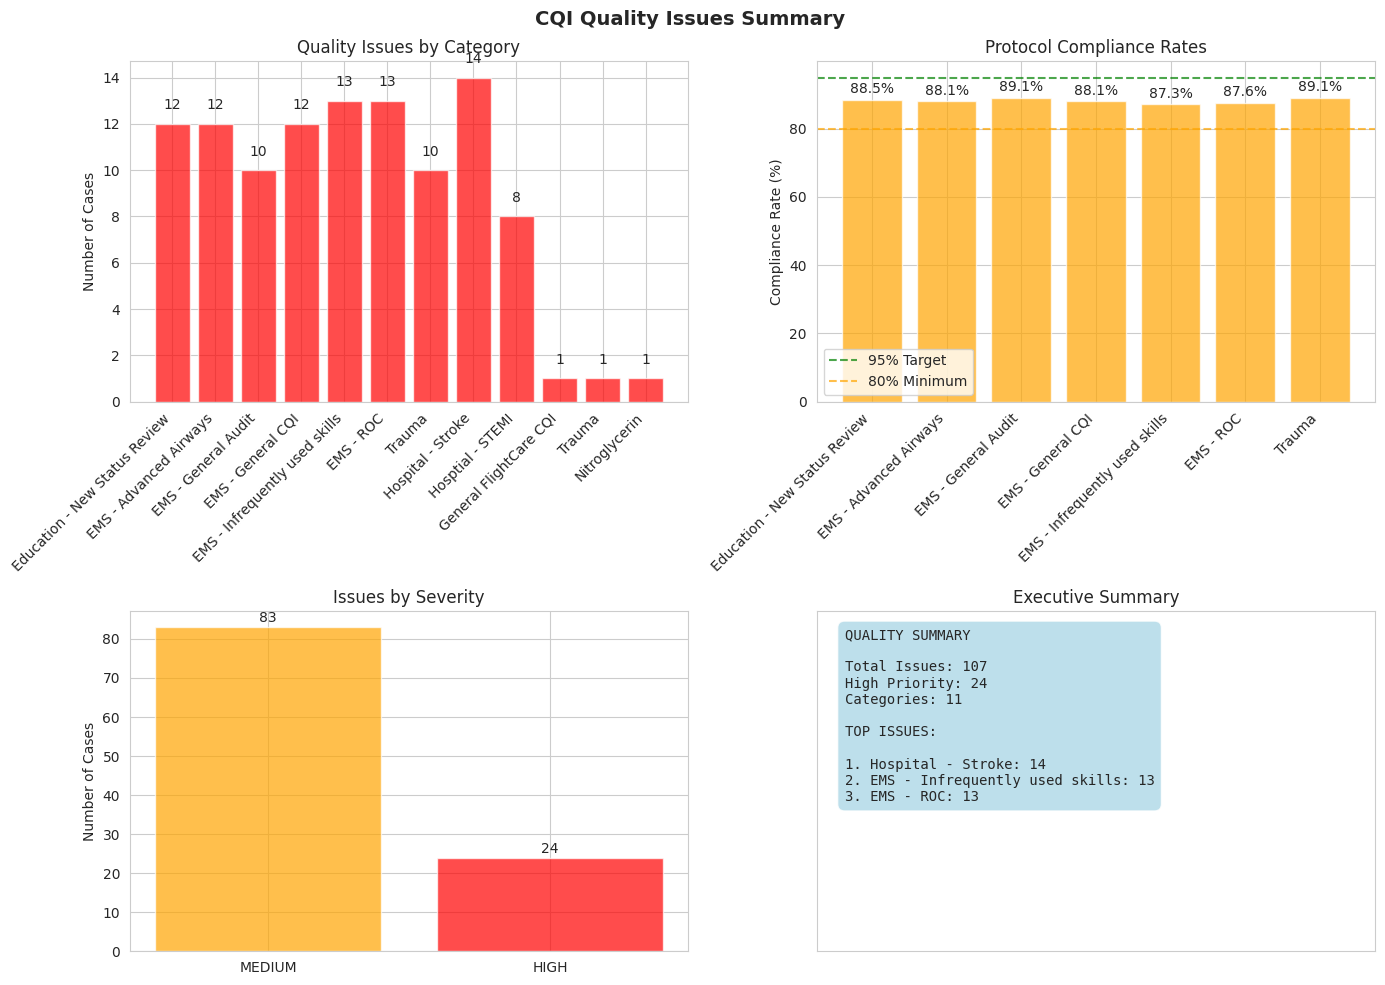


🎯 SUMMARY REPORT
📊 Total quality issues found: 12
💾 Details exported to: CQI_Quality_Issues_20250701_2208.csv

🚨 HIGH PRIORITY ISSUES:
  • Hospital - Stroke: Time metric concern: No (14 cases)
  • Hosptial - STEMI: Time metric concern: No (8 cases)
  • General FlightCare CQI: Time metric concern: No (1 cases)
  • Trauma: Time metric concern: No (1 cases)

⚠️ MEDIUM PRIORITY ISSUES:
  • EMS - Infrequently used skills: Protocol Not Followed (13 cases)
  • EMS - ROC: Protocol Not Followed (13 cases)
  • Education - New Status Review: Protocol Not Followed (12 cases)
  • EMS - Advanced Airways: Protocol Not Followed (12 cases)
  • EMS - General CQI: Protocol Not Followed (12 cases)

✅ CQI QUALITY ANALYSIS COMPLETE!
📁 Files saved to current directory: /home/jovyan/work

💡 You can move these files to your desired output folder:
   /Users/johnny/DataspellProjects/Projects/ems_qi/EOM_CQI_Numbers/output/


In [38]:
# SIMPLIFIED CQI QUESTION ANALYSIS - SAVES TO CURRENT DIRECTORY
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# Save to current working directory (DataSpell can always write here)
OUTPUT_DIR = os.getcwd()
print(f"✅ Saving files to current directory: {OUTPUT_DIR}")

print("🔍 COMPREHENSIVE CQI QUESTION ANALYSIS")
print("=" * 60)

def analyze_cqi_questions():
    """Analyze all CQI question responses to identify quality issues"""

    # Get all CQI question columns
    cqi_question_cols = [col for col in data.columns if 'CQI [' in col and '?' in col]

    print(f"📊 Found {len(cqi_question_cols)} CQI question fields")
    print("=" * 50)

    # Show sample questions by category
    protocol_questions = [col for col in cqi_question_cols if 'protocol' in col.lower()]
    time_questions = [col for col in cqi_question_cols if any(word in col.lower() for word in ['time', 'minutes'])]
    assessment_questions = [col for col in cqi_question_cols if 'assessment' in col.lower() or 'documented' in col.lower()]
    medication_questions = [col for col in cqi_question_cols if any(med in col.lower() for med in ['aspirin', 'nitro'])]

    print(f"Protocol Questions: {len(protocol_questions)}")
    print(f"Time-Related Questions: {len(time_questions)}")
    print(f"Assessment Questions: {len(assessment_questions)}")
    print(f"Medication Questions: {len(medication_questions)}")

    return cqi_question_cols

def analyze_protocol_compliance(cqi_cols):
    """Focus on protocol compliance issues"""

    print(f"\n🚨 PROTOCOL COMPLIANCE ANALYSIS")
    print("=" * 40)

    protocol_cols = [col for col in cqi_cols if 'protocol' in col.lower() and 'followed' in col.lower()]

    critical_findings = []

    if protocol_cols:
        for col in protocol_cols:
            responses = data[col].value_counts()

            if 'No' in responses or 'Yes' in responses:
                category = col.split('[')[-1].split(']')[0] if '[' in col else 'Unknown'

                no_count = responses.get('No', 0)
                yes_count = responses.get('Yes', 0)
                total = no_count + yes_count

                if total > 0:
                    compliance_rate = (yes_count / total) * 100

                    print(f"\n{category}:")
                    print(f"  Protocol Followed - Yes: {yes_count}, No: {no_count}")
                    print(f"  Compliance Rate: {compliance_rate:.1f}%")

                    if no_count > 0:
                        severity = 'HIGH' if compliance_rate < 80 else 'MEDIUM'
                        critical_findings.append({
                            'Category': category,
                            'Issue': 'Protocol Not Followed',
                            'Count': no_count,
                            'Total_Responses': total,
                            'Compliance_Rate': compliance_rate,
                            'Severity': severity
                        })

                        if compliance_rate < 80:
                            print(f"  🚨 LOW COMPLIANCE - Needs immediate attention!")

    return critical_findings

def analyze_time_metrics(cqi_cols):
    """Analyze time-critical responses"""

    print(f"\n⏱️ TIME-CRITICAL ANALYSIS")
    print("=" * 30)

    time_findings = []
    time_cols = [col for col in cqi_cols if any(phrase in col.lower() for phrase in ['12 lead', 'time', 'minutes'])]

    for col in time_cols:
        responses = data[col].value_counts()

        if len(responses) > 0:
            category = col.split('[')[-1].split(']')[0] if '[' in col else col.split('?')[0][-40:]

            print(f"\n{category}:")

            # Show top responses
            for response, count in responses.head(5).items():
                if pd.notna(response) and response != '(blank)':
                    print(f"  {response}: {count}")

            # Flag concerning responses
            concerning_responses = ['No', 'Not done', 'Missing', '>10 minutes', '>5 minutes']
            for concern in concerning_responses:
                if concern in responses:
                    time_findings.append({
                        'Category': category,
                        'Issue': f'Time metric concern: {concern}',
                        'Count': responses[concern],
                        'Severity': 'HIGH' if 'No' in concern else 'MEDIUM'
                    })

    return time_findings

def analyze_medication_issues(cqi_cols):
    """Analyze medication administration"""

    print(f"\n💊 MEDICATION ADMINISTRATION ANALYSIS")
    print("=" * 40)

    med_findings = []
    med_cols = [col for col in cqi_cols if any(med in col.lower() for med in ['aspirin', 'nitro'])]

    for col in med_cols:
        responses = data[col].value_counts()

        if 'No' in responses:
            med_name = 'Aspirin' if 'aspirin' in col.lower() else 'Nitroglycerin' if 'nitro' in col.lower() else 'Medication'
            no_count = responses['No']
            yes_count = responses.get('Yes', 0)

            print(f"\n{med_name}:")
            print(f"  Administered - Yes: {yes_count}, No: {no_count}")

            if no_count > 0:
                admin_rate = yes_count / (yes_count + no_count) * 100 if (yes_count + no_count) > 0 else 0
                print(f"  Administration Rate: {admin_rate:.1f}%")

                med_findings.append({
                    'Category': med_name,
                    'Issue': 'Medication not administered',
                    'Count': no_count,
                    'Administration_Rate': admin_rate,
                    'Severity': 'MEDIUM'
                })

    return med_findings

def create_simple_quality_dashboard(protocol_findings, time_findings, med_findings):
    """Create a simple quality dashboard"""

    all_findings = protocol_findings + time_findings + med_findings

    if not all_findings:
        print("No quality issues found to visualize")
        return

    print(f"\n📊 CREATING QUALITY DASHBOARD")
    print("=" * 35)

    # Create simple charts
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle('CQI Quality Issues Summary', fontsize=14, fontweight='bold')

    # 1. Issues by category
    ax1 = axes[0, 0]
    categories = [f['Category'] for f in all_findings]
    counts = [f['Count'] for f in all_findings]

    if categories:
        bars = ax1.bar(range(len(categories)), counts, color='red', alpha=0.7)
        ax1.set_title('Quality Issues by Category')
        ax1.set_ylabel('Number of Cases')
        ax1.set_xticks(range(len(categories)))
        ax1.set_xticklabels(categories, rotation=45, ha='right')

        # Add count labels
        for bar, count in zip(bars, counts):
            height = bar.get_height()
            ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{count}', ha='center', va='bottom')

    # 2. Protocol compliance rates
    ax2 = axes[0, 1]
    protocol_data = [f for f in protocol_findings if 'Compliance_Rate' in f]

    if protocol_data:
        categories = [f['Category'] for f in protocol_data]
        rates = [f['Compliance_Rate'] for f in protocol_data]
        colors = ['red' if rate < 80 else 'orange' if rate < 95 else 'green' for rate in rates]

        bars = ax2.bar(categories, rates, color=colors, alpha=0.7)
        ax2.set_title('Protocol Compliance Rates')
        ax2.set_ylabel('Compliance Rate (%)')
        ax2.axhline(y=95, color='green', linestyle='--', alpha=0.7, label='95% Target')
        ax2.axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='80% Minimum')
        plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
        ax2.legend()

        # Add percentage labels
        for bar, rate in zip(bars, rates):
            height = bar.get_height()
            ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{rate:.1f}%', ha='center', va='bottom')

    # 3. Issue severity
    ax3 = axes[1, 0]
    severity_counts = {}
    for finding in all_findings:
        sev = finding.get('Severity', 'UNKNOWN')
        severity_counts[sev] = severity_counts.get(sev, 0) + finding['Count']

    if severity_counts:
        colors = {'HIGH': 'red', 'MEDIUM': 'orange', 'LOW': 'yellow'}
        sev_colors = [colors.get(sev, 'gray') for sev in severity_counts.keys()]

        bars = ax3.bar(severity_counts.keys(), severity_counts.values(), color=sev_colors, alpha=0.7)
        ax3.set_title('Issues by Severity')
        ax3.set_ylabel('Number of Cases')

        for bar, count in zip(bars, severity_counts.values()):
            height = bar.get_height()
            ax3.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{count}', ha='center', va='bottom')

    # 4. Summary text
    ax4 = axes[1, 1]

    total_issues = sum(f['Count'] for f in all_findings)
    high_issues = sum(f['Count'] for f in all_findings if f.get('Severity') == 'HIGH')
    categories_affected = len(set(f['Category'] for f in all_findings))

    summary_text = f"""QUALITY SUMMARY

Total Issues: {total_issues}
High Priority: {high_issues}
Categories: {categories_affected}

TOP ISSUES:
"""

    # Add top 3 issues
    top_issues = sorted(all_findings, key=lambda x: x['Count'], reverse=True)[:3]
    for i, issue in enumerate(top_issues, 1):
        summary_text += f"\n{i}. {issue['Category']}: {issue['Count']}"

    ax4.text(0.05, 0.95, summary_text, transform=ax4.transAxes, fontsize=10,
            verticalalignment='top', fontfamily='monospace',
            bbox=dict(boxstyle="round,pad=0.5", facecolor="lightblue", alpha=0.8))
    ax4.set_xlim(0, 1)
    ax4.set_ylim(0, 1)
    ax4.set_xticks([])
    ax4.set_yticks([])
    ax4.set_title('Executive Summary')

    plt.tight_layout()

    # Save to current directory
    timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
    filename = f'CQI_Quality_Dashboard_{timestamp}.png'
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    print(f"💾 Dashboard saved: {filename}")

    plt.show()

    return filename

# Main execution
print("Starting CQI question analysis...")

# 1. Get all CQI questions
cqi_cols = analyze_cqi_questions()

# 2. Analyze protocol compliance
protocol_findings = analyze_protocol_compliance(cqi_cols)

# 3. Analyze time metrics
time_findings = analyze_time_metrics(cqi_cols)

# 4. Analyze medication issues
med_findings = analyze_medication_issues(cqi_cols)

# 5. Create dashboard
dashboard_file = create_simple_quality_dashboard(protocol_findings, time_findings, med_findings)

# 6. Export findings
print(f"\n🎯 SUMMARY REPORT")
print("=" * 20)

all_findings = protocol_findings + time_findings + med_findings

if all_findings:
    # Create summary dataframe
    summary_df = pd.DataFrame(all_findings)

    # Save to CSV
    timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M")
    csv_filename = f'CQI_Quality_Issues_{timestamp}.csv'
    summary_df.to_csv(csv_filename, index=False)

    print(f"📊 Total quality issues found: {len(all_findings)}")
    print(f"💾 Details exported to: {csv_filename}")

    # Show top priorities
    high_priority = [f for f in all_findings if f.get('Severity') == 'HIGH']
    if high_priority:
        print(f"\n🚨 HIGH PRIORITY ISSUES:")
        for issue in sorted(high_priority, key=lambda x: x['Count'], reverse=True):
            print(f"  • {issue['Category']}: {issue['Issue']} ({issue['Count']} cases)")

    medium_priority = [f for f in all_findings if f.get('Severity') == 'MEDIUM']
    if medium_priority:
        print(f"\n⚠️ MEDIUM PRIORITY ISSUES:")
        for issue in sorted(medium_priority, key=lambda x: x['Count'], reverse=True)[:5]:
            print(f"  • {issue['Category']}: {issue['Issue']} ({issue['Count']} cases)")

else:
    print("✅ No significant quality issues found in CQI responses")

print(f"\n✅ CQI QUALITY ANALYSIS COMPLETE!")
print(f"📁 Files saved to current directory: {os.getcwd()}")
print(f"\n💡 You can move these files to your desired output folder:")
print(f"   /Users/johnny/DataspellProjects/Projects/ems_qi/EOM_CQI_Numbers/output/")